# Getting Up To Speed: Playing with Tools

## Including the Sources
The following statement includes all of the computations defined throughout our repository. The simplest unit of computation is getting familiar with our stationary kernels, i.e. Radial Basis Functions.

In [20]:
include("../bayesian_optimization.jl")

bayesian_optimize! (generic function with 1 method)

### Radial Basis Functions (`radial_basis_functions.jl`)
As discussed before, we have a struct, `RadialBasisFunction`, that enables us to perform computations with these mathematical structures. The constructor, `RadialBasisFunctionGeneric`, constructs a `RadialBasisFunction` given a function $k$ and hyperparamete vector $\theta$. We have a few kernels implemented, however, for demonstration purposes, it may be useful to implement one yourself.

Let's consider the [squared exponential](https://www.cs.toronto.edu/~duvenaud/cookbook/) kernel with form
$$
k_{\text{SE}}(x, x') = s^2 \exp\left(
     -\frac{1}{2}(x - x')^TP^{-1}(x - x')
 \right)
$$
for positive $s$ and positive definite $P$. Typically, $P = \ell^2I$ and the above
has form
$$
k_{\text{SE}}(x, x') = s^2 \exp\left(
     -\frac{1}{2}\left(\frac{||x - x'||}{\ell}\right)^2
 \right)
$$

where scale factor $s$ and the lengthscale $\ell$ are kernel hyperparameters. Computationally, we can define this as

In [7]:
function squared_exponential(rho, theta)
    s, ell = theta[1], theta[2]
    return s^2 * exp(-.5 * (rho / ell)^2)
end

theta = [1., 1.]
MySquaredExponential =  RadialBasisFunctionGeneric(squared_exponential, theta)

RadialBasisFunction{Float64}

### Practicum
A few reasonable things to do here are the following:
* Generate some random samples for some arbitrary function and collect them into $X, y$.
    * I'd start off with a function in 1D so visualization is easy.
* Compute the covariance matrix $K$ and cholesky factorization $L$ associated with $X$.
* Plot the predictive variance and predictive mean over some interval to visualize behavior.

A few examples of arbitrary functions can be found in `testfns.jl` with some useful helper functions, but I'll select one to get you started.

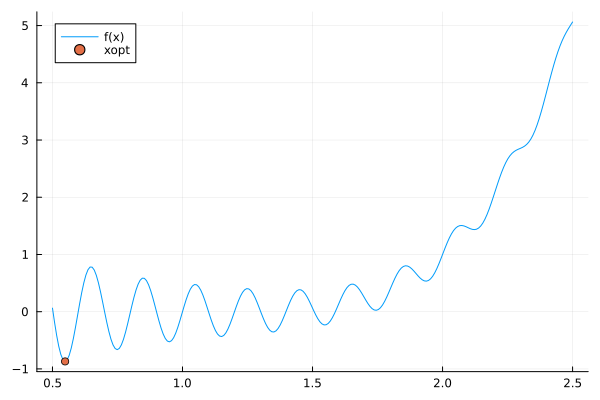

In [15]:
testfn = TestGramacyLee()
tplot(testfn)

In [40]:
# Fill in the following
observation_noise = 1e-8
lbs, ubs = get_bounds(testfn)
N = 27
X = randsample(N, testfn.dim, lbs, ubs)
y = testfn(X) + observation_noise * randn(N)

kernel = MySquaredExponential
K = eval_KXX(kernel, X)
# I is the identity matrix provided by the package LinearAlgebra and can intuit
# the correct size for I based on the size of K.
K = K + observation_noise * I
L = cholesky(K).L
c = L' \ (L \ y)

27-element Vector{Float64}:
  1.515785161384544e7
  1.6112299514755335e7
 -6.753087690487403e6
  1.2542045550205668e6
 -2.5434604596945625e7
  1.3144276497594381e6
 -2.435120050440235e7
  4.466940107994911e7
  5.836340179456005e7
 -1.327071159080825e7
  3.191398102205358e7
 -1.4928255518947816e7
 -2.1601505450449634e7
  ⋮
 -7.824539937130387e7
  4.276607390603983e7
 -2.1509536059185848e7
 -1.3462297857754586e7
  4.545123567539918e7
  1.5414281299282463e7
 -1.0298267756275777e7
 -2.9404130312080644e7
  1.5645521829825275e7
  4.008136039123182e7
 -3.8225653111630104e7
 -1.2959432451522145e7

In [41]:
# Do this assuming a zero mean gaussian process
# You can use any number of arguments you please or implement this
# in some other fashion. You know the defining equations, so you
# have everything you need.
function predictive_mean(x, c, X, kernel)
    kx = eval_KxX(kernel, x, X)
    μx = dot(kx, c)
    return μx
end
# function predictive_variance end

predictive_mean (generic function with 1 method)

In [26]:
X = randsample(4, 1, [0.], [10.])
kernel = Matern52()
K = kernel(X)
det(K)

0.5863427439361129

In [36]:
Xhat = hcat(X, X[:,1])
Khat = kernel(Xhat)
det(Khat)

0.0

In [43]:
cholesky(Khat + 1e-8*I)

Cholesky{Float64, Matrix{Float64}}
U factor:
5×5 UpperTriangular{Float64, Matrix{Float64}}:
 1.0  5.75181e-5  1.11988e-5   0.00188242   1.0
  ⋅   1.0         0.624749     0.178463     5.75181e-13
  ⋅    ⋅          0.780826    -0.0802441   -3.16787e-13
  ⋅    ⋅           ⋅           0.980667     1.90647e-11
  ⋅    ⋅           ⋅            ⋅           0.000141421